# **PHÂN TÍCH KHÁM PHÁ DỮ LIỆU MUA SẮM TẠI SIÊU THỊ**

**Tập dữ liệu lấy từ
https://www.kaggle.com/code/rajatkumar30/eda-online-retail**

**1. Tổng quan về Dữ liệu và Mục tiêu Phân tích**

**1.1. Mô tả Tập dữ liệu (Data Description)**

Tập dữ liệu này là Dữ liệu giao dịch Bán lẻ Trực tuyến (Online Retail Transaction Data), bao gồm các giao dịch được thực hiện bởi một nhà bán lẻ phi cửa hàng có trụ sở tại Vương quốc Anh từ ngày 01/12/2010 đến 09/12/2011.

Các trường dữ liệu chính được sử dụng bao gồm: InvoiceNo, Quantity, UnitPrice, InvoiceDate, CustomerID, và Country.

**1.2. Mục tiêu Phân tích Khám phá (EDA Objectives)**

Mục tiêu chính là xây dựng bức tranh toàn diện về động lực doanh thu và hành vi khách hàng để hỗ trợ ra quyết định chiến lược.

Phân tích Xu hướng Thời gian: Nhận diện các giai đoạn bán hàng cao điểm (peak seasons) qua biến động Tổng Doanh thu theo tháng.

Đánh giá Mức độ Tập trung Thị trường: Xác định các quốc gia đóng góp lớn nhất về Doanh thu và Đơn hàng, so sánh Đơn giá Trung bình giữa các thị trường.

Xác định Phân khúc Khách hàng Cốt lõi: Tập trung vào thị trường Vương quốc Anh (UK) để phân tích Phân bố Tần suất mua hàng (Frequency), từ đó đề xuất chiến lược giữ chân khách hàng.

## **Import thư viện**

In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho biểu đồ
plt.style.use('default')
sns.set_palette("husl")

## **Đọc dữ liệu Online_Retail.xlxs**

In [5]:
# Đọc dữ liệu Online_Retail.xlxs
online_retail_data = pd.read_excel('data/Online_Retail.xlsx')

In [6]:
# Xem kích thước dữ liệu
print("Kích thước dữ liệu:", online_retail_data.shape)

Kích thước dữ liệu: (541909, 8)


In [7]:
# Xem thông tin dữ liệu
print("\nThông tin dữ liệu:")
online_retail_data.info()


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## **Làm sạch dữ liệu**

Quá trình làm sạch dữ liệu nhằm đảm bảo tính toàn vẹn và độ chính xác của tập dữ liệu phân tích.

**Xử lý và Tiền xử lý Dữ liệu (Data Cleaning and Preprocessing)**

 Quá trình làm sạch dữ liệu nhằm đảm bảo tính toàn vẹn và độ chính xác của tập dữ liệu phân tích. Đầu tiên, các dòng trùng lặp được loại bỏ để tránh tính toán sai lệch trong thống kê. Tiếp theo, các giao dịch không hợp lệ (hóa đơn bị hủy, Quantity ≤0 và UnitPrice ≤0) đã được lọc bỏ. Cuối cùng, kiểu dữ liệu của CustomerID được chuyển về dạng số nguyên (integer) và cột TotalPrice (Doanh thu) được tính toán, hoàn thiện tập dữ liệu cho các bước phân tích khám phá tiếp theo.

### **Loại bỏ dữ liệu trùng lặp**

In [8]:
# Xem các dòng trùng lặp (trùng về mặt giá trị tất cả các cột)
duplicate_rows = online_retail_data[online_retail_data.duplicated()]
# in các dòng có cùng giá trị
print("\nCác dòng trùng lặp:")
print(duplicate_rows)
print("\nSố dòng trùng lặp:", duplicate_rows.shape[0])


Các dòng trùng lặp:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    201

In [9]:
# Loại bỏ các dòng trùng lặp
online_retail_data = online_retail_data.drop_duplicates()
print("\nKích thước dữ liệu sau khi loại bỏ dòng trùng lặp:", online_retail_data.shape)


Kích thước dữ liệu sau khi loại bỏ dòng trùng lặp: (536641, 8)


In [10]:
# Xem các dòng trùng lặp (trùng về mặt giá trị tất cả các cột)
duplicate_rows = online_retail_data[online_retail_data.duplicated()]
print("\nSố dòng trùng lặp:", duplicate_rows.shape[0])


Số dòng trùng lặp: 0


### **Xử lý dữ liệu bị thiếu**

In [11]:
# Xem các giá trị bị thiếu trong từng cột
print("\nSố giá trị bị thiếu trong từng cột:")
missing_values = online_retail_data.isnull().sum()
print(missing_values)


Số giá trị bị thiếu trong từng cột:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


- Xử lý giá trị thiếu ở cột Description

In [12]:
# Thay thế giá trị thiếu ở cột Description bằng chuỗi "Unknown"
online_retail_data['Description'] = online_retail_data['Description'].fillna('Unknown')

In [13]:
# Kiểm tra lại số giá trị bị thiếu sau xử lý
print("\nSố giá trị bị thiếu sau xử lý:")
print(online_retail_data.isnull().sum())


Số giá trị bị thiếu sau xử lý:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


#XỬ LÝ VÀ TRỰC QUAN HOÁ DỮ LIỆU

#1. Trực quan hoá dữ liệu với Matplotlib

# Chuẩn bị dữ liệu để trực quan hoá


In [37]:
#Tạo cột mới để trực quan hoá dữ liệu
# 1. Cột Tổng Doanh thu (TotalPrice)
online_retail_data['TotalPrice'] = online_retail_data['Quantity'] * online_retail_data['UnitPrice']

# 2. Cột Thời gian theo Tháng (InvoiceMonth)
online_retail_data['InvoiceMonth'] = online_retail_data['InvoiceDate'].dt.to_period('M')


**Giải thích đoạn mã tạo cột mới để trực quan hóa dữ liệu**

Đoạn mã này tạo hai cột mới trong DataFrame để chuẩn bị cho việc phân tích và trực quan hóa:

1.  **Cột 'TotalPrice'**: Tính tổng doanh thu của mỗi giao dịch bằng cách nhân `Quantity` (Số lượng sản phẩm) với `UnitPrice` (Đơn giá).
2.  **Cột 'InvoiceMonth'**: Trích xuất thông tin tháng và năm từ cột `InvoiceDate` (Ngày hóa đơn) để phân tích xu hướng theo thời gian theo từng tháng.

In [38]:
# --- TỔNG HỢP DATAFRAME CHO CÁC BIỂU ĐỒ ---
# Chart 1: Doanh thu theo thời gian
monthly_revenue = online_retail_data.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].astype(str)

# Chart 2: Top 10 Khách hàng
customer_revenue = online_retail_data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

# Chart 3: Top 10 Quốc gia
top_10_countries_revenue = online_retail_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

# Chart 4: Top 10 Sản phẩm theo Doanh thu
product_revenue = online_retail_data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

# Chart 5: Top 10 Sản phẩm theo Số lượng
product_quantity = online_retail_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

# Chart 6: Số lượng Khách hàng Mới theo Tháng
min_purchase_date = online_retail_data.groupby('CustomerID')['InvoiceDate'].min().reset_index()
min_purchase_date['AcquisitionMonth'] = min_purchase_date['InvoiceDate'].dt.to_period('M')
new_customer_monthly = min_purchase_date.groupby('AcquisitionMonth')['CustomerID'].count().reset_index(name='NewCustomerCount')
new_customer_monthly['AcquisitionMonth'] = new_customer_monthly['AcquisitionMonth'].astype(str)

**Giải thích đoạn mã tổng hợp DataFrame cho các biểu đồ**

Đoạn mã này chuẩn bị các bảng dữ liệu (DataFrames) riêng biệt để sẵn sàng cho việc vẽ các loại biểu đồ khác nhau. Mỗi phần trong đoạn mã này thực hiện việc nhóm dữ liệu gốc (`online_retail_data`) và tính toán các chỉ số tổng hợp (tổng doanh thu, số lượng, số đơn hàng, số khách hàng mới) dựa trên các tiêu chí khác nhau như tháng, khách hàng, quốc gia, hoặc sản phẩm.

*   **`monthly_revenue`**: Tính tổng doanh thu theo từng tháng.
*   **`customer_revenue`**: Xác định 10 khách hàng có tổng chi tiêu cao nhất.
*   **`top_10_countries_revenue`**: Xác định 10 quốc gia có tổng doanh thu cao nhất.
*   **`product_revenue`**: Xác định 10 sản phẩm có tổng doanh thu cao nhất.
*   **`product_quantity`**: Xác định 10 sản phẩm bán chạy nhất theo số lượng.
*   **`new_customer_monthly`**: Đếm số lượng khách hàng mới theo từng tháng.

Mục đích là để tạo ra các bảng dữ liệu tổng hợp gọn gàng, chỉ chứa những thông tin cần thiết cho mỗi biểu đồ cụ thể, giúp việc trực quan hóa sau này trở nên đơn giản và hiệu quả hơn.

#**Case 1:Biểu đồ đường cơ bản cho xu hướng doanh thu hàng tháng**

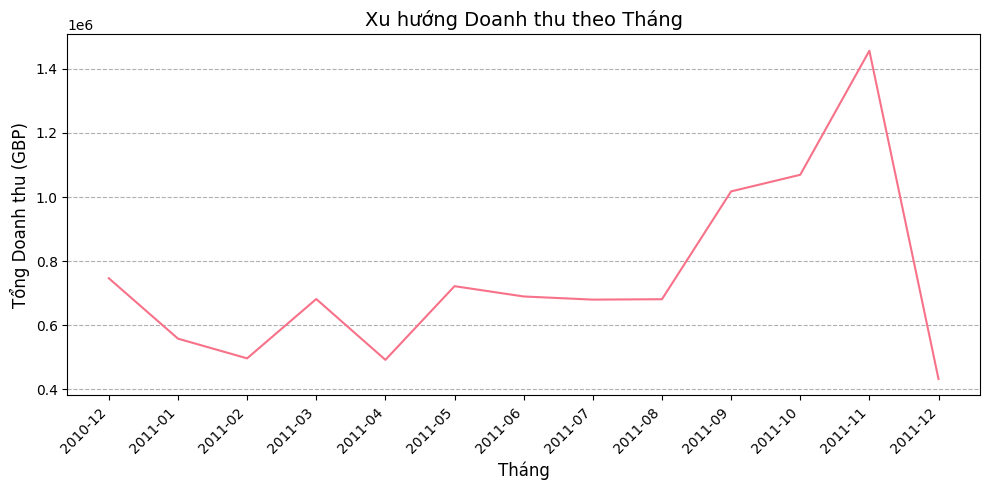

In [49]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='InvoiceMonth', y='TotalPrice', data=monthly_revenue)
plt.title('Xu hướng Doanh thu theo Tháng', fontsize=14)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Tổng Doanh thu (GBP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/online_retail/Xu hướng doanh thu theo tháng.png')
plt.show()
plt.close()

**Biểu đồ đường thể hiện sự thay đổi tổng doanh thu theo từng tháng trong giai đoạn thu thập dữ liệu (Tháng 12/2010 - Tháng 12/2011).**

**Nhận xét:** Biểu đồ đường này phác họa rõ ràng tính thời vụ và động lực tăng trưởng của doanh nghiệp trong suốt năm phân tích. Dữ liệu cho thấy một sự tăng trưởng đều đặn nhưng có tính chu kỳ cao. Đáng chú ý là đỉnh điểm doanh thu được ghi nhận vào Tháng 11, khẳng định tác động mạnh mẽ của mùa mua sắm cuối năm. Ngược lại, sự sụt giảm doanh thu ngay sau đó vào Tháng 1 và Tháng 4 gợi ý các giai đoạn "hạ nhiệt" tự nhiên sau các kỳ nghỉ lễ lớn. Các nhà quản lý nên xem xét các tháng có doanh thu thấp (như Tháng 4) là mục tiêu chính cho các chiến dịch khuyến mãi hoặc ra mắt sản phẩm mới để cân bằng dòng tiền giữa các quý.

#**Case 2: Top 10 Quốc gia theo Tổng Doanh Thu**

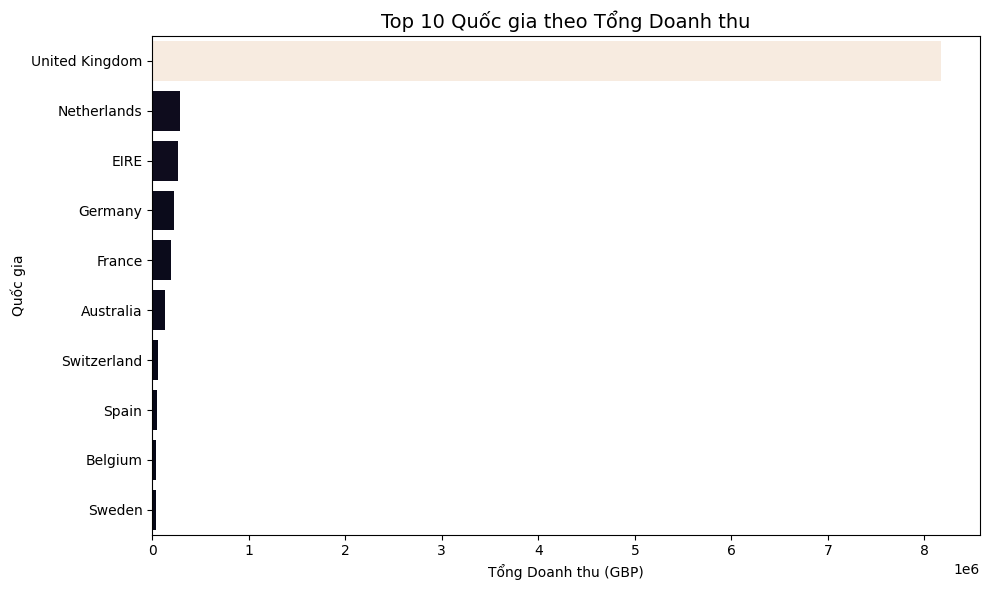

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPrice', y='Country', data=top_10_countries_revenue, palette='rocket', hue='TotalPrice', legend=False)
plt.title('Top 10 Quốc gia theo Tổng Doanh thu', fontsize=14)
plt.xlabel('Tổng Doanh thu (GBP)')
plt.ylabel('Quốc gia')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/online_retail/Top 10 Quốc gia theo Tổng doanh thu.png')
plt.show()
plt.close()

**Giải thích đoạn mã phân tích Top 10 khách hàng theo Tổng Chi tiêu**

Đoạn mã này thực hiện các bước để xác định và trực quan hóa 10 khách hàng có tổng chi tiêu cao nhất:

1.  **Tính tổng chi tiêu cho từng khách hàng**: Nhóm dữ liệu theo `CustomerID` và tính tổng `TotalPrice` cho mỗi khách hàng.
2.  **Xác định Top 10**: Sắp xếp khách hàng theo tổng chi tiêu giảm dần và chỉ lấy 10 khách hàng đầu tiên.
3.  **Vẽ biểu đồ cột**: Sử dụng dữ liệu của Top 10 khách hàng để vẽ biểu đồ cột, hiển thị tổng chi tiêu của mỗi khách hàng. Trục x hiển thị ID khách hàng (đã chuyển sang dạng chuỗi để dễ đọc), trục y hiển thị tổng chi tiêu.

Mục đích là để nhận diện những khách hàng đóng góp nhiều doanh thu nhất cho doanh nghiệp.

**Nhận xét:** Biểu đồ thanh này là minh chứng rõ ràng nhất cho Nguyên lý Pareto (80/20), khi một số ít khách hàng cá nhân đóng góp một phần không nhỏ vào tổng doanh thu. Sự khác biệt về mức chi tiêu giữa khách hàng đứng đầu (ID 14646) và các khách hàng còn lại là rất lớn. Những khách hàng này không chỉ là nguồn thu nhập mà còn là tài sản chiến lược của công ty. Sự phụ thuộc vào nhóm khách hàng này yêu cầu một chính sách quản lý quan hệ khách hàng (CRM) đặc biệt, tập trung vào các chương trình giữ chân, ưu đãi độc quyền và theo dõi sát sao hành vi mua hàng để giảm thiểu rủi ro mất đi nguồn thu nhập cốt lõi này.

#**Case 3: Phân phối Đơn giá**

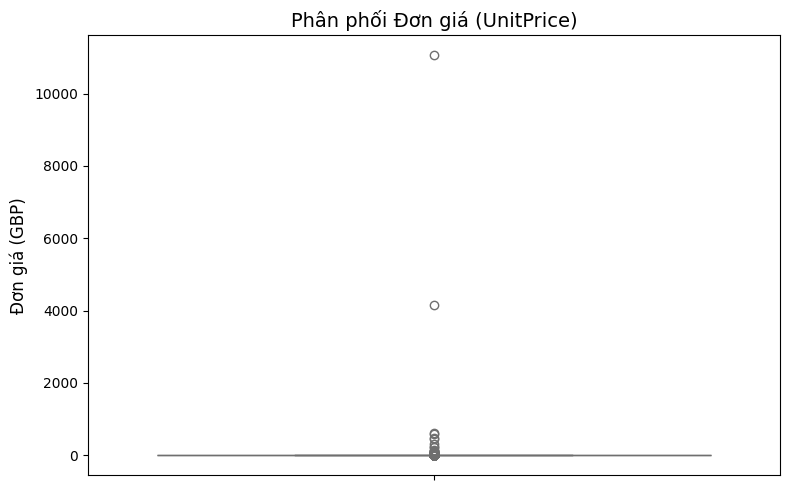

In [51]:
# Sử dụng boxplot để tập trung vào sự phân tán và ngoại lai của UnitPrice
plt.figure(figsize=(8, 5))
# Lấy mẫu ngẫu nhiên 10,000 giá trị UnitPrice để Box Plot dễ nhìn hơn
sample_unit_price = online_retail_data['UnitPrice'].sample(n=min(len(online_retail_data), 10000), random_state=42)
sns.boxplot(y=sample_unit_price, color='skyblue')
plt.title('Phân phối Đơn giá (UnitPrice)', fontsize=14)
plt.ylabel('Đơn giá (GBP)', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/online_retail/Phân phối đơn gia.png')
plt.show()
plt.close()

**Biểu đồ hộp (Box Plot) cho thấy sự phân tán của đơn giá sản phẩm. Để đảm bảo tính rõ ràng, lấy mẫu ngẫu nhiên 10,000 điểm dữ liệu.**

**Nhận xét:** Biểu đồ hộp (Box Plot) này tiết lộ cấu trúc định giá tổng thể của danh mục sản phẩm. Giá trị trung vị (Median) thấp cho thấy mô hình kinh doanh chủ yếu dựa vào các mặt hàng tiêu dùng nhanh, giá phải chăng và khối lượng giao dịch lớn. Tuy nhiên, sự xuất hiện dày đặc của các giá trị ngoại lai (Outliers) ở phía trên (đặc biệt là các giao dịch có đơn giá cực cao) là một chi tiết quan trọng. Điều này có thể đại diện cho các mặt hàng bán buôn, hàng xa xỉ hoặc các giao dịch đặc biệt với mức giá cao, nhưng cũng cần được kiểm tra chéo để loại trừ khả năng lỗi nhập liệu nghiêm trọng. Sự phân tán này gợi ý cần có hai chiến lược bán hàng song song: một cho thị trường đại chúng (giá thấp) và một cho thị trường ngách/bán buôn (giá cao)

# 2. Trực quan hoá dữ liệu với Seaborn

#**Case 1: Top 10 Sản phẩm theo Tổng Doanh thu**

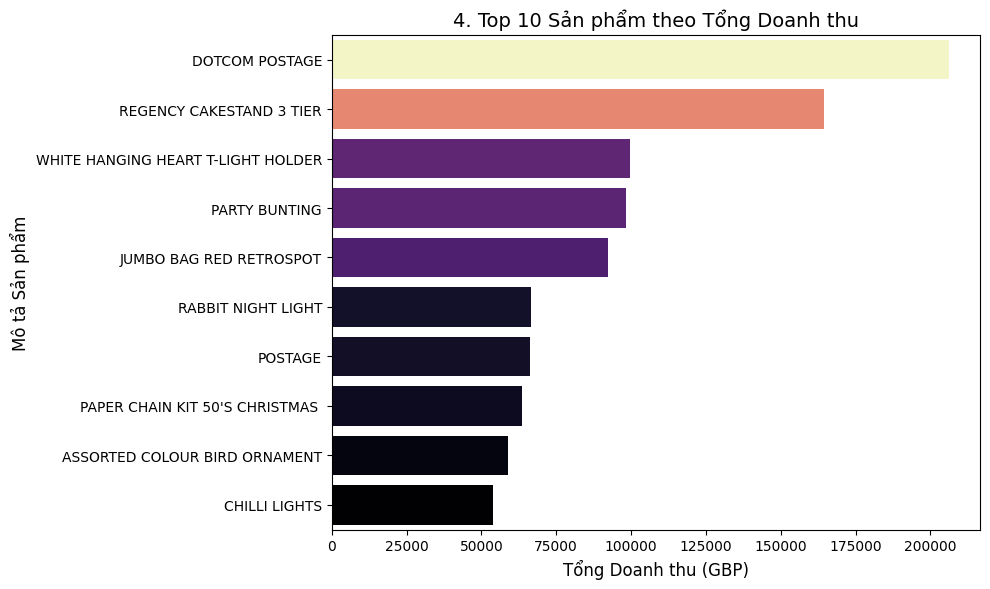

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPrice', y='Description', data=product_revenue, palette='magma', hue='TotalPrice', legend=False)
plt.title('4. Top 10 Sản phẩm theo Tổng Doanh thu', fontsize=14)
plt.xlabel('Tổng Doanh thu (GBP)', fontsize=12)
plt.ylabel('Mô tả Sản phẩm', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/online_retail/Top 10 sản phẩm theo Tổng doanh thu.png')
plt.show()
plt.close()

**Giải thích đoạn mã phân tích Top 10 Sản phẩm theo Tổng Doanh thu**

Đoạn mã này xác định và trực quan hóa 10 sản phẩm mang lại doanh thu cao nhất:

1.  **Tính tổng doanh thu cho từng sản phẩm**: Gom nhóm dữ liệu theo `Description` (Mô tả Sản phẩm) và tính tổng `TotalPrice` (Tổng Doanh thu) cho mỗi sản phẩm.
2.  **Xác định Top 10**: Sắp xếp các sản phẩm theo tổng doanh thu giảm dần và chỉ lấy 10 sản phẩm đầu tiên.
3.  **Vẽ biểu đồ thanh**: Sử dụng dữ liệu của Top 10 sản phẩm để vẽ biểu đồ thanh ngang, hiển thị tổng doanh thu của mỗi sản phẩm. Trục ngang (`x`) là Tổng Doanh thu, trục dọc (`y`) là Mô tả Sản phẩm.

Mục đích là để nhận diện những sản phẩm chủ lực đóng góp nhiều doanh thu nhất cho doanh nghiệp.

**Nhận xét:** Biểu đồ thanh ngang này xác định rõ các mặt hàng, sản phẩm mang lại lợi nhuận cao nhất. Các mặt hàng như DOTCOM POSTAGE và REGENCY CAKESTAND 3 TIER là những động lực chính thúc đẩy tài chính doanh nghiệp. Chiến lược tập trung cho nhóm sản phẩm này phải là tối ưu hóa biên lợi nhuận, đảm bảo tính sẵn có và quảng bá chúng như những mặt hàng chủ lực để kéo theo các sản phẩm khác. Sự thành công về doanh thu của chúng cần được phân tích sâu hơn về yếu tố giá cả (UnitPrice) và số lượng (Quantity) để hiểu rõ động lực tạo ra giá trị.

#**Case 2: Top 10 Sản phẩm theo Tổng Số lượng Bán**

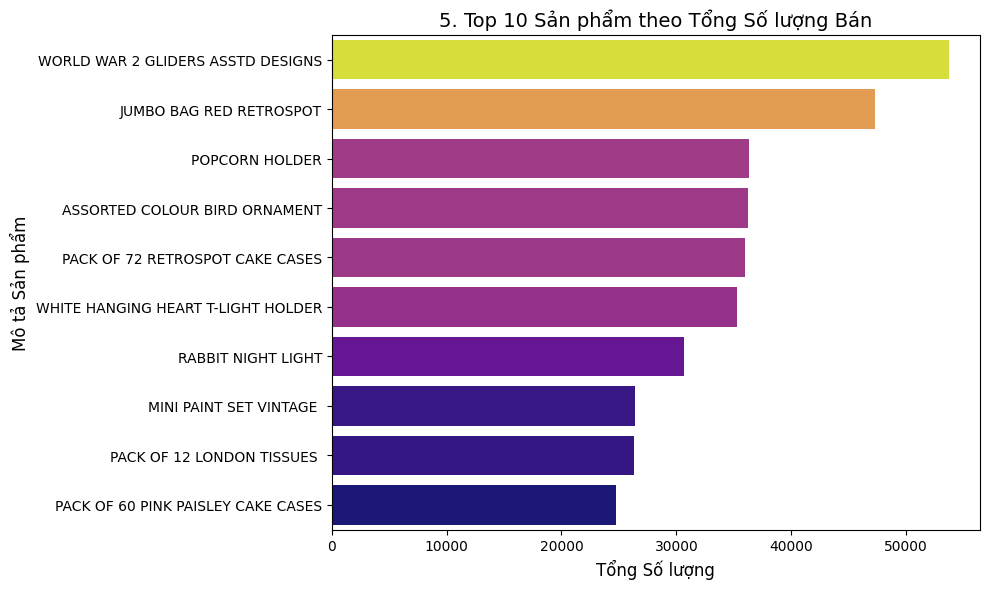

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Description', data=product_quantity, palette='plasma', hue='Quantity', legend=False)
plt.title('5. Top 10 Sản phẩm theo Tổng Số lượng Bán', fontsize=14)
plt.xlabel('Tổng Số lượng', fontsize=12)
plt.ylabel('Mô tả Sản phẩm', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/online_retail/Top 10 sản phẩm theo Tổng số lượng bán.png')
plt.show()
plt.close()

**Giải thích đoạn mã phân tích Top 10 Sản phẩm theo Tổng Số lượng Bán**

Đoạn mã này xác định và trực quan hóa 10 sản phẩm bán chạy nhất theo số lượng:

1.  **Tính tổng số lượng bán cho từng sản phẩm**: Gom nhóm dữ liệu theo `Description` (Mô tả Sản phẩm) và tính tổng `Quantity` (Tổng Số lượng) cho mỗi sản phẩm.
2.  **Xác định Top 10**: Sắp xếp các sản phẩm theo tổng số lượng giảm dần và chỉ lấy 10 sản phẩm đầu tiên.
3.  **Vẽ biểu đồ thanh**: Sử dụng dữ liệu của Top 10 sản phẩm để vẽ biểu đồ thanh ngang, hiển thị tổng số lượng bán của mỗi sản phẩm. Trục ngang (`x`) là Tổng Số lượng, trục dọc (`y`) là Mô tả Sản phẩm.

Mục đích là để nhận diện những sản phẩm được tiêu thụ nhiều nhất.

**Nhận xét:** Biểu đồ này chỉ ra các mặt hàng có nhu cầu thị trường lớn nhất về khối lượng. Mặc dù danh sách này có thể trùng lặp với danh sách doanh thu, nhưng các sản phẩm như WORLD WAR 2 GLIDERS ASSTD DESIGNS (thường là hàng giá trị thấp, mua số lượng lớn) có thể xuất hiện nổi bật. Đây là những mặt hàng tạo ra lưu lượng giao dịch và duy trì tần suất mua sắm của khách hàng. Ưu tiên hàng đầu cho nhóm này là quản lý chuỗi cung ứng và tồn kho, đảm bảo không bao giờ hết hàng để tránh làm giảm sự hài lòng của khách hàng và bỏ lỡ các cơ hội bán hàng hàng ngày.

#**Case 3: Số lượng Khách hàng mới theo tháng**

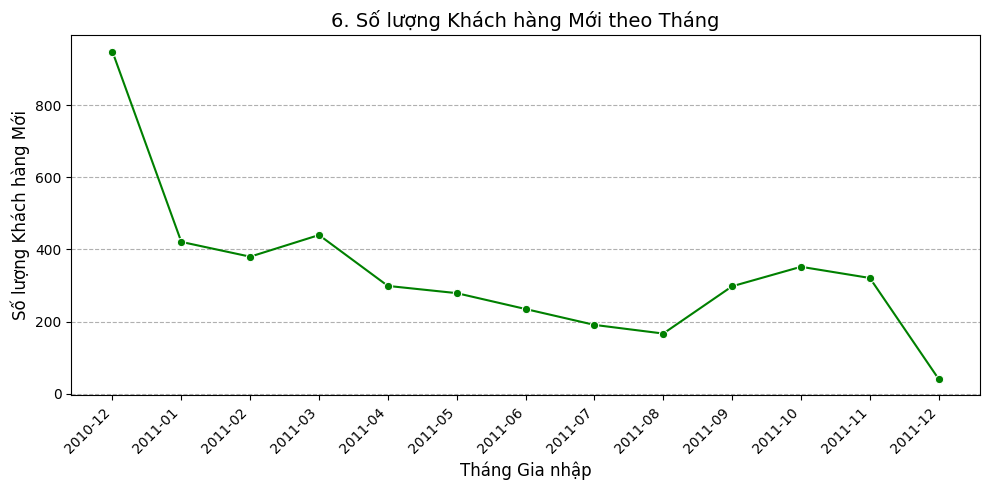

In [54]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='AcquisitionMonth', y='NewCustomerCount', data=new_customer_monthly, marker='o', color='green')
plt.title('6. Số lượng Khách hàng Mới theo Tháng', fontsize=14)
plt.xlabel('Tháng Gia nhập', fontsize=12)
plt.ylabel('Số lượng Khách hàng Mới', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PTDL 25-26/lab01-Xử lý trực quan hoá dữ liệu/img/online_retail/Số lượng khách hàng mới theo tháng.png')
plt.show()
plt.close()

**Nhận xét:** Biểu đồ đường này theo dõi tốc độ mở rộng cơ sở khách hàng của doanh nghiệp. Hiệu suất thu hút khách hàng mới cho thấy sự thành công của các chiến dịch tiếp thị và sức hấp dẫn của thị trường. Nếu tốc độ thu hút khách hàng mới có xu hướng giảm sau những tháng đầu, điều này cảnh báo về sự bão hòa của thị trường mục tiêu hoặc sự suy giảm hiệu quả của các kênh marketing. Phân tích chỉ số này là nền tảng để tính toán Chi phí Thu hút Khách hàng (CAC) và đánh giá tính bền vững của mô hình tăng trưởng trong dài hạn.

#**KẾT LUẬN**

Phân tích 6 biểu đồ đã xác định được ba động lực chính chi phối hoạt động kinh doanh, làm cơ sở vững chắc cho các quyết định chiến lược.

**1. Rủi ro Phụ thuộc Giá trị**

Dữ liệu cho thấy sự tập trung giá trị là rủi ro lớn nhất về mặt tài chính. Sự chi phối doanh thu của Tháng 11 và của Top 10 Khách hàng (theo nguyên lý Pareto) cho thấy mô hình kinh doanh đang phụ thuộc vào tính thời vụ và một nhóm khách hàng cốt lõi. Việc quản lý rủi ro này đòi hỏi chiến lược Giữ chân Khách hàng (Retention) chuyên biệt và phân bổ nguồn lực marketing nhằm cân bằng dòng tiền trong các tháng đầu năm.

**2. Định hình Chiến lược Thị trường**

Thị trường United Kingdom chiếm ưu thế tuyệt đối về doanh thu, nhưng các thị trường quốc tế như Netherlands, EIRE, và Germany lại là những thị trường có hiệu suất cao nhất. Sự tăng trưởng của Khách hàng Mới theo Tháng phải được liên kết với những thị trường này. Hàm ý chiến lược là phải ưu tiên ngân sách mở rộng và tối ưu hóa vận hành tại các thị trường quốc tế đang tăng trưởng để giảm dần sự phụ thuộc vào thị trường nội địa.

**3. Phân cấp Quản lý Sản phẩm**

Danh mục sản phẩm được phân loại thành hai nhóm chiến lược:

**Sản phẩm Lợi nhuận (High-Revenue):** Những mặt hàng này là động lực tài chính chính, cần được ưu tiên trong việc bảo vệ biên lợi nhuận và đảm bảo nguồn cung ổn định.

**Sản phẩm Tần suất (High-Volume):** Những mặt hàng này là yếu tố duy trì lưu lượng giao dịch và sự hài lòng. Quản lý tồn kho phải ưu tiên tuyệt đối cho nhóm này để đảm bảo tính liên tục của giao dịch, ngay cả khi giá trị đơn vị của chúng không cao.

**Tóm lại:** Để tối đa hóa lợi nhuận, doanh nghiệp cần chuyển hướng từ mô hình kinh doanh bị động theo mùa vụ sang mô hình tăng trưởng bền vững, thông qua việc đầu tư mạnh vào các chương trình giữ chân khách hàng VIP và mở rộng thị trường quốc tế đã được chứng minh hiệu quả